# Week 7
# Plotting with Matplotlib
1. Create subplots
2. Adjust ticks, legends, labels
3. Add annotations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Download Bitcoin trading data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
BTC = pd.DataFrame(json.loads(res.content)['Data'])

# Use time as index
BTC = BTC.set_index('time')
BTC.index = pd.to_datetime(BTC.index, unit='s')

BTC.head(3)#

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2018-04-20,8945.14,8243.49,8301.82,114730.74,9.799949e+08,8877.08,direct,
2018-04-21,9047.82,8631.18,8877.15,93635.24,8.290734e+08,8935.72,direct,
2018-04-22,9043.98,8788.44,8935.85,68212.83,6.101831e+08,8823.36,direct,


In [3]:
# Install yahoo finance library
!pip install --upgrade pip
!pip install yfinance

     ---------------------------------------- 2.1/2.1 MB 22.3 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ch002\anaconda3\python.exe -m pip install --upgrade pip


In [13]:
import yfinance as yf

Apple = yf.download('AAPL', start="2018-04-20")
Apple.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-20,42.650002,42.8050,41.357498,41.430000,39.388348,261964400
2018-04-23,41.707500,41.7300,41.022499,41.310001,39.274261,146062000
2018-04-24,41.417500,41.5825,40.305000,40.735001,38.727600,134768000


## 1. Four plots on the price change
- Scatter plot
- Histogram

Text(0.5, 1.0, 'Apple Stock')

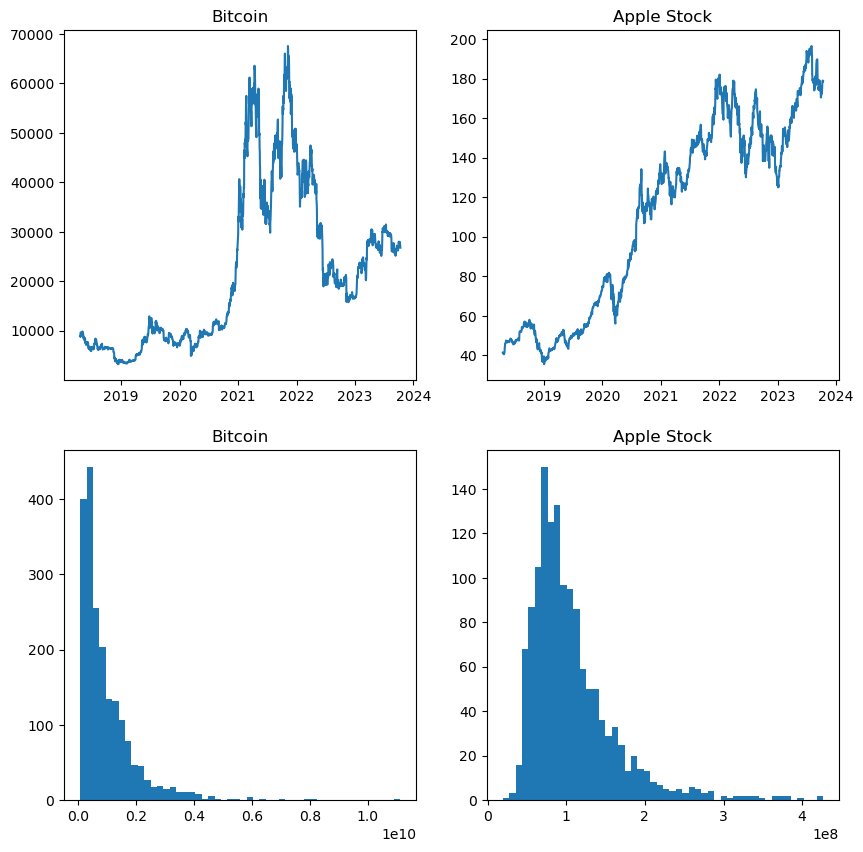

In [21]:
fig = plt.figure(figsize=(10, 10))

# Add axes for the first subplot
ax1 = fig.add_subplot(2, 2, 1) # What do these numbers mean?
                               # (number of rows, number of columns, the index of this particular plot)

# plot BTC price change (close price vs. time)
ax1.plot(BTC.index, BTC['close'])
ax1.set_title("Bitcoin")

# Add axes for the second subplot
ax2 = fig.add_subplot(2, 2, 2)

# plot SPY price change (close price vs. time)
ax2.plot(Apple.index, Apple['Close'])
ax2.set_title("Apple Stock")
# ax2.set_ylim([0, 4000])

# The third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(BTC['volumeto'], bins=50)
ax3.set_title("Bitcoin")

# The fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(Apple['Volume'], bins=50)
ax4.set_title("Apple Stock")

## 2 Ticks, labels, and legends

(2500.0, 15000.0)

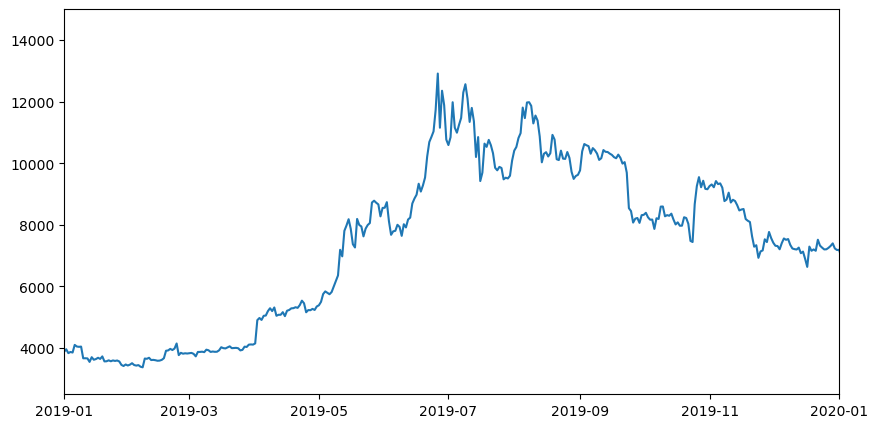

In [22]:
# Specify limits on the x-axis and y-axis
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])

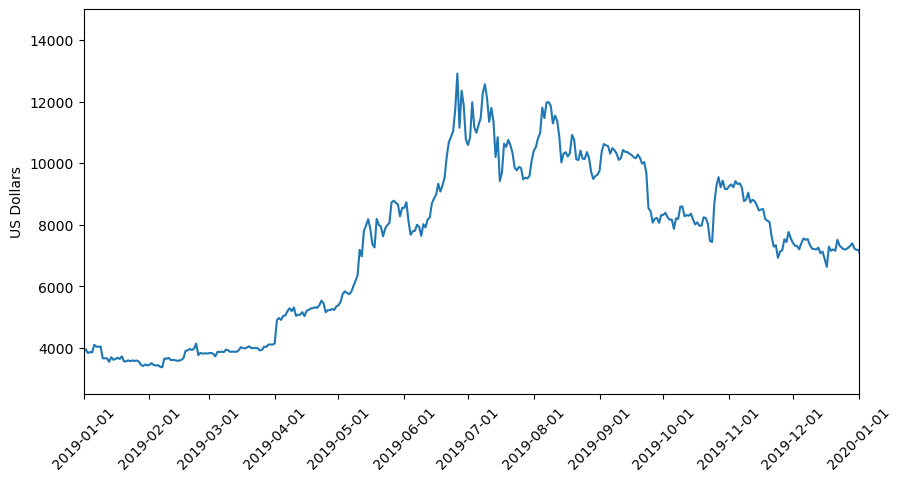

In [31]:
# Show ticks for every month
plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])
ticks = [datetime(2019, x, 1) for x in range(1, 13)]
ticks.append(datetime(2020, 1, 1))
plt.xticks(ticks, rotation=45)

# Add y label
plt.ylabel("US Dollars")

plt.show()

## 3. Add Annotations

2019-06-26 00:00:00


Text(2018-10-01 00:00:00, 25000, 'Peak value: 19000')

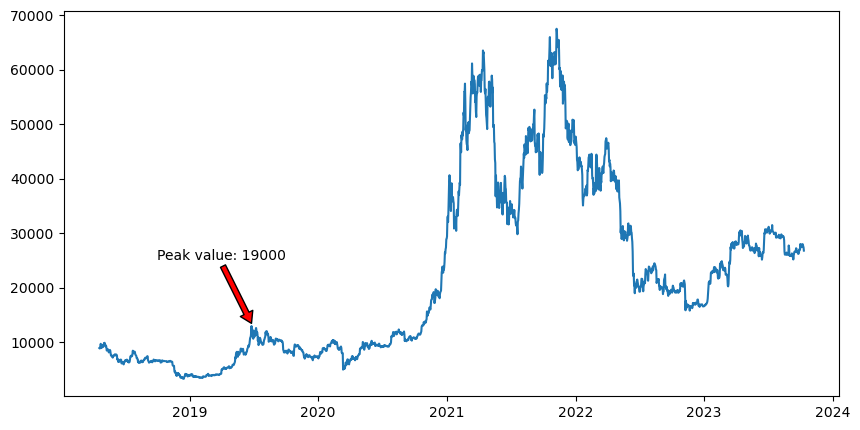

In [41]:
from datetime import timedelta

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])

# Find the day in 2019 that achieves the peak value.
BTC_2019 = BTC[BTC.index < datetime(2020, 1, 1)]
peak_day = BTC_2019['close'].idxmax()
print(peak_day)

# Point out the peak value
plt.annotate('Peak value: 19000',
             xy=(peak_day, BTC.loc[peak_day, 'close'] + 500),
             xytext=(datetime(2018, 10, 1), 25000),
             arrowprops=dict(facecolor='red', headwidth=10, width=4, headlength=8))

# # Highlight the dramatic increase in 2018
# rectangle = plt.Rectangle((datetime(2017, 5, 1), 2500),
#                           timedelta(days=200),
#                           17500,
#                           color='k',
#                           alpha=0.3)
# plt.gca().add_patch(rectangle)

# # Add text description
# plt.text(datetime(2017, 5, 1),
#          1500,
#          "Bitcoin price increased 5 times within 200 days",
#          fontsize=12)